In [21]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('results_llama.csv')

# Assuming the baseline is the first row in the dataframe
baseline = df.iloc[0]

# Compute speedup 
df['Speedup'] = baseline[' latency'] / df[' latency']
# Compute efficiency 
df['EnergyReduction'] = baseline[' energy'] / df[' energy']

# Display the dataframe with the new columns
df

,dataflow,latency,energy,warnings,Speedup,EnergyReduction
0,baseline (#1),302.514209,461.74220,[Model-wise Buffer Summary]\nModel-wise total ...,1.000000,1.000000
1,kmspatial_N1 (#2),286.294049,456.49850,Model-wise total L2 size usage: 92928\nModel-w...,1.056656,1.011487
2,kmspatial (#3),17.908912,116.89940,"""Model-wise total L2 size usage: 8478720 Mode...",16.891825,3.949911
3,nkspatial (#4),22.302640,121.96673,"""Model-wise total L2 size usage: 2973696 Mode...",13.564054,3.785805


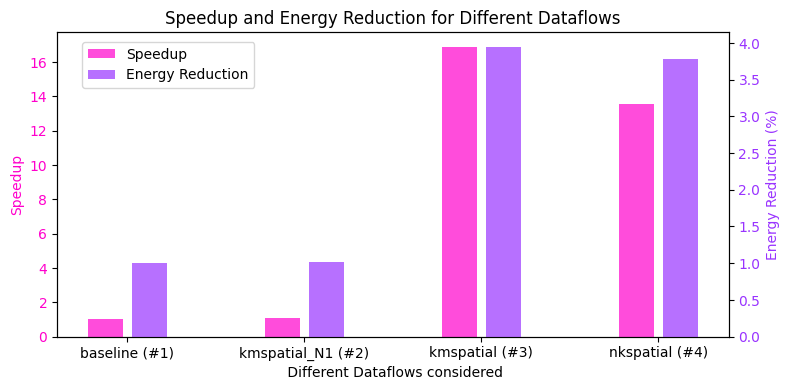

In [47]:
fig, ax1 = plt.subplots(figsize=(8, 4))  # Reduce the figure size

# Define the positions of the bars
index = np.arange(len(df['dataflow']))

# Plot Speedup
ax1.bar(index, df['Speedup'], bar_width, color=pink, alpha=0.7, label='Speedup')
ax1.set_xlabel(' Different Dataflows considered')
ax1.set_ylabel('Speedup', color=pink)
ax1.tick_params(axis='y', labelcolor=pink)

# Create a secondary y-axis for Energy Reduction
ax2 = ax1.twinx()
ax2.bar(index + bar_width + 0.05, df['EnergyReduction'], bar_width, color=purple, alpha=0.7, label='Energy Reduction')  # Add a small gap
ax2.set_ylabel('Energy Reduction (%)', color=purple)
ax2.tick_params(axis='y', labelcolor=purple)

# Add title and legend
plt.title('Speedup and Energy Reduction for Different Dataflows')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Set x-ticks and labels
ax1.set_xticks(index + bar_width / 2 + 0.025)  # Adjust x-ticks to match the new bar positions
ax1.set_xticklabels(df['dataflow'])

plt.show()

# Export the high quality graph
fig.savefig('high_quality_graph.png', dpi=300, bbox_inches='tight')
